In [1]:
!pip install catboost ta

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

from ta import add_all_ta_features




In [3]:
# Download historical data from Yahoo Finance
def download_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data



In [4]:
ticker_symbol = 'RELIANCE.NS'
start_date = '2010-01-01'
end_date = '2023-10-15'



In [5]:
data = download_stock_data(ticker_symbol, start_date, end_date)



[*********************100%%**********************]  1 of 1 completed


In [6]:
data.dropna(inplace = True)

In [7]:
# Calculate additional features
data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")

C:\Users\pradn\anaconda3\envs\python39\lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3403 entries, 2010-01-04 to 2023-10-13
Data columns (total 92 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       3403 non-null   float64
 1   High                       3403 non-null   float64
 2   Low                        3403 non-null   float64
 3   Close                      3403 non-null   float64
 4   Adj Close                  3403 non-null   float64
 5   Volume                     3403 non-null   int64  
 6   volume_adi                 3403 non-null   float64
 7   volume_obv                 3403 non-null   int64  
 8   volume_cmf                 3384 non-null   float64
 9   volume_fi                  3390 non-null   float64
 10  volume_em                  3399 non-null   float64
 11  volume_sma_em              3347 non-null   float64
 12  volume_vpt                 3402 non-null   float64
 13  volume_vwap                339

In [9]:
# Drop NaN values
data.drop(['trend_psar_up','trend_psar_down','Open','High','Low','Close'],axis = 1, inplace= True)
data = data.dropna()

In [10]:
# Define the target variable
target = 'Adj Close'
data['Target'] = data[target].shift(-1)  # Predict next day's closing price
data.dropna(inplace = True)
data.drop(['Adj Close'],axis = 1, inplace= True)



C:\Users\pradn\AppData\Local\Temp\ipykernel_21228\3129840661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data[target].shift(-1)  # Predict next day's closing price
C:\Users\pradn\AppData\Local\Temp\ipykernel_21228\3129840661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)
C:\Users\pradn\AppData\Local\Temp\ipykernel_21228\3129840661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [11]:
# Split data into train and test sets
#The function dataframe.columns.difference() gives you complement of the values that you provide as argument. It can be used to create a new dataframe 
#from an existing dataframe with exclusion of some columns. The function returns as output a new list of columns from the existing columns excluding
#the ones given as arguments. You can also check it:
features = data.columns.difference(['Target'])
X = data[features]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)



In [12]:
# Standardize predictor variables
#Standardize features by removing the mean and scaling to unit variance. 
#The standard score of a sample x is calculated as:
#z = (x - u) / s
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [13]:
# Initialize and train the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('SVR', SVR()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('XGBoost Regressor', XGBRegressor()),
    ('CatBoost Regressor', CatBoostRegressor(verbose=0)),
]



In [14]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
count,2.302000e+03,2.302000e+03,2302.000000,2.302000e+03,2302.000000,2.302000e+03,2.302000e+03,2.302000e+03,2302.000000,2.302000e+03,...,2.302000e+03,2302.000000,2.302000e+03,2302.000000,2.302000e+03,2.302000e+03,2.302000e+03,2.302000e+03,2.302000e+03,2302.000000
mean,4.321285e-17,-4.938612e-17,0.000000,1.234653e-17,0.000000,7.407917e-17,-9.259897e-18,-1.543316e-17,0.000000,-1.234653e-17,...,2.469306e-16,0.000000,3.086632e-18,0.000000,2.469306e-17,4.938612e-16,4.938612e-17,-1.234653e-17,2.469306e-16,0.000000
std,1.000217e+00,1.000217e+00,1.000217,1.000217e+00,1.000217,1.000217e+00,1.000217e+00,1.000217e+00,1.000217,1.000217e+00,...,1.000217e+00,1.000217,1.000217e+00,1.000217,1.000217e+00,1.000217e+00,1.000217e+00,1.000217e+00,1.000217e+00,1.000217
min,-1.532612e+00,-4.799116e+00,-0.961347,-2.637822e+00,-3.062597,-2.581439e+00,-2.559732e+00,-2.867467e+00,-2.913886,-2.863693e+00,...,-1.660236e+00,-3.470541,-1.810041e+01,-8.569159,-2.883703e+00,-2.464638e+00,-1.220359e+00,-6.997563e+00,-1.114761e+00,-0.962867
25%,-6.203805e-01,-6.050947e-01,-0.640866,-6.864440e-01,-0.712973,-7.070512e-01,-6.947029e-01,-6.423195e-01,-0.724254,-6.994948e-01,...,-8.425537e-01,-0.659964,-2.102939e-01,-0.331389,-6.714197e-01,-7.127145e-01,-7.413839e-01,-2.801769e-01,-7.981627e-01,-0.650549
50%,-2.276611e-01,-4.963480e-02,-0.412784,3.476134e-02,-0.007721,2.026259e-02,-9.005568e-02,-1.109720e-01,-0.067048,-4.954773e-02,...,-1.750223e-01,0.023939,1.794308e-02,-0.124185,2.396270e-02,-7.788725e-02,-3.540166e-01,3.242558e-02,-3.233792e-01,-0.411277
75%,3.402242e-01,4.830738e-01,0.240776,6.292344e-01,0.641003,6.392150e-01,5.716584e-01,5.405060e-01,0.628900,6.388493e-01,...,6.012372e-01,0.733877,2.597382e-01,0.136355,6.794564e-01,5.470341e-01,3.905744e-01,3.206642e-01,8.475366e-01,0.262662
max,1.196479e+01,3.867847e+00,2.703190,3.270325e+00,3.682880,3.096269e+00,5.481705e+00,6.444308e+00,4.487808,4.273590e+00,...,2.945872e+00,2.991365,6.734595e+00,12.838129,2.604656e+00,3.304648e+00,2.192307e+00,4.166117e+00,2.406397e+00,2.753574


In [15]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,...,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,0.496177,0.379088,5.622217,0.111247,-0.018529,0.126989,-0.064028,-0.020133,-0.068322,0.069378,...,-2.674516,0.002855,-0.077149,0.348003,-0.046603,-5.902437,3.485071,-0.099566,4.369815,5.648084
std,1.875666,3.667422,1.535001,1.400439,1.272104,1.421878,1.120755,1.063234,1.163697,1.272995,...,0.852300,0.945198,7.558445,4.192094,1.045062,1.438746,0.726643,7.955602,0.820691,1.538426
min,-1.652171,-11.682105,1.455759,-7.011858,-5.455961,-6.315906,-3.027583,-2.340597,-3.215795,-6.257972,...,-3.698005,-2.364408,-34.191606,-21.454785,-2.851173,-7.393916,1.477561,-31.251355,1.520928,1.478811
25%,-0.633804,-2.268680,4.935555,-0.727843,-0.769188,-0.733145,-0.799502,-0.728993,-0.824028,-0.679570,...,-3.363973,-0.693692,-3.166240,-1.089205,-0.782710,-6.708810,3.358684,-3.968898,4.516116,4.930709
50%,-0.126221,0.096590,6.164217,-0.075379,-0.033402,-0.052073,-0.214674,-0.202322,-0.174509,-0.006186,...,-3.037875,-0.057814,0.162841,-0.045346,-0.050593,-6.269986,3.842247,0.084279,4.728739,6.141072
75%,0.900401,3.067298,6.827644,0.942625,0.664651,0.990046,0.584901,0.504624,0.677725,0.857101,...,-1.989015,0.733319,3.239861,1.371847,0.668470,-5.933566,4.005382,4.193772,4.821369,6.813229
max,13.629842,9.888978,7.857872,4.072217,5.856076,3.735374,3.757657,4.897604,3.566932,6.146553,...,-0.678766,2.704716,45.002152,27.389585,2.429483,-1.419816,4.205101,31.484041,5.008096,7.736534


In [16]:
#results = {}
#for name, model in models:
#    model.fit(X_train, y_train)
#    predictions = model.predict(X_test)
#    mse = mean_squared_error(y_test, predictions)
#    results[name] = mse



In [17]:
LinearRegression().fit(X_train,y_train).predict(X_test)

array([1266.06226688, 1264.78719949, 1268.97619323, 1270.15609609,
       1284.81265444, 1324.64194836, 1316.40915165, 1316.99415077,
       1319.25886344, 1324.72792376, 1353.04898074, 1375.64686623,
       1372.90648367, 1348.79562087, 1393.93563415, 1395.14210122,
       1402.30072832, 1435.53609149, 1446.41680505, 1429.94417307,
       1419.80104428, 1422.29522929, 1414.27632301, 1405.78349157,
       1426.50033124, 1412.97856765, 1395.2753238 , 1438.8484468 ,
       1427.27035936, 1432.63009548, 1418.03262332, 1464.64345283,
       1504.36293481, 1492.04650684, 1500.12034106, 1515.05559088,
       1517.64580983, 1527.21237697, 1538.17034725, 1510.2221834 ,
       1556.25904198, 1544.0934782 , 1512.44973398, 1514.77579169,
       1520.32542755, 1531.85070366, 1518.5443871 , 1517.20295886,
       1520.62989217, 1535.93075436, 1514.78611625, 1510.34446808,
       1529.52562301, 1568.9271231 , 1553.25757211, 1525.56148511,
       1507.02663159, 1474.53582162, 1503.5636468 , 1505.91118

In [18]:
GradientBoostingRegressor().fit(X_train,y_train).predict(X_test)

array([1282.32682241, 1282.47381678, 1284.83881462, 1282.46565311,
       1298.8388024 , 1326.8018993 , 1320.32881063, 1327.97590635,
       1327.90081739, 1324.09978247, 1329.51206942, 1328.23123266,
       1332.53454566, 1327.08898723, 1324.47427076, 1323.77149733,
       1325.25657754, 1327.41114949, 1322.11136659, 1326.63551163,
       1322.4292114 , 1330.57176623, 1323.96844086, 1343.85759308,
       1355.66726318, 1350.50427107, 1341.31114525, 1360.07964184,
       1357.13267134, 1358.89419228, 1352.24379297, 1353.98019578,
       1355.08425523, 1349.69700716, 1355.65937074, 1342.93037019,
       1345.18413899, 1343.13005202, 1340.99479144, 1343.66889699,
       1346.75445953, 1336.59617145, 1339.03446097, 1350.10811676,
       1342.95409644, 1348.75383994, 1343.76626811, 1343.91597326,
       1345.62968256, 1348.56051778, 1338.49641671, 1334.26003543,
       1343.59062183, 1353.96557464, 1353.58829705, 1337.36835715,
       1334.93721778, 1333.5567979 , 1335.34608388, 1337.14012

In [19]:
SVR().fit(X_train,y_train).predict(X_test)

array([681.39574239, 664.42282125, 682.16106297, 671.2670078 ,
       692.48922296, 650.5561092 , 663.51034961, 670.22880138,
       674.91460089, 671.53939454, 654.53870719, 647.57848217,
       651.51937009, 658.82453419, 626.93987251, 627.35281218,
       629.01306869, 625.74751918, 623.86411049, 632.01326788,
       632.68687953, 641.48819398, 642.86768213, 631.68740212,
       646.72224975, 653.40613191, 647.14457392, 642.00109168,
       632.56041886, 653.95198066, 664.70693205, 625.66123787,
       606.94604041, 622.21433091, 621.7679253 , 621.53790668,
       622.84651494, 618.50481215, 622.39877185, 627.75897185,
       613.41728121, 620.98582701, 610.66529307, 635.63952792,
       637.80076447, 639.18411296, 640.46651168, 642.37984096,
       642.56685204, 639.71526224, 643.34031658, 640.76792823,
       644.55290982, 603.93880384, 638.58948797, 639.52929583,
       634.89712125, 601.91318096, 642.52264301, 651.36843383,
       622.55506243, 637.07554857, 650.5312695 , 658.05

In [20]:
#results

In [21]:
# Train LSTM and GRU models

X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32)



Epoch 1/10
72/72 [==============================] - 11s 80ms/step - loss: 409209.3750
Epoch 2/10
72/72 [==============================] - 6s 83ms/step - loss: 401130.3438
Epoch 3/10
72/72 [==============================] - 6s 87ms/step - loss: 396545.8750
Epoch 4/10
72/72 [==============================] - 7s 95ms/step - loss: 392149.3438
Epoch 5/10
72/72 [==============================] - 7s 99ms/step - loss: 387738.8438
Epoch 6/10
72/72 [==============================] - 7s 99ms/step - loss: 383527.3750
Epoch 7/10
72/72 [==============================] - 7s 99ms/step - loss: 379416.0938
Epoch 8/10
72/72 [==============================] - 7s 99ms/step - loss: 375380.7812
Epoch 9/10
72/72 [==============================] - 7s 99ms/step - loss: 371403.5625
Epoch 10/10
72/72 [==============================] - 7s 99ms/step - loss: 367487.0938


In [22]:
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model_gru.add(GRU(units=50, return_sequences=True))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train_lstm, y_train, epochs=10, batch_size=32)



Epoch 1/10
72/72 [==============================] - 13s 113ms/step - loss: 408535.1250
Epoch 2/10
72/72 [==============================] - 9s 125ms/step - loss: 399394.9688
Epoch 3/10
72/72 [==============================] - 9s 122ms/step - loss: 394704.8750
Epoch 4/10
72/72 [==============================] - 9s 125ms/step - loss: 390278.9688
Epoch 5/10
72/72 [==============================] - 9s 121ms/step - loss: 385983.6562
Epoch 6/10
72/72 [==============================] - 9s 123ms/step - loss: 381788.4062
Epoch 7/10
72/72 [==============================] - 9s 120ms/step - loss: 377656.6250
Epoch 8/10
72/72 [==============================] - 9s 119ms/step - loss: 373580.0625
Epoch 9/10
72/72 [==============================] - 9s 121ms/step - loss: 369560.3438
Epoch 10/10
72/72 [==============================] - 9s 119ms/step - loss: 365602.9375


In [23]:
# Evaluate LSTM and GRU models
predictions_lstm = model_lstm.predict(X_test_lstm)
predictions_gru = model_gru.predict(X_test_lstm)
#mse_lstm = mean_squared_error(y_test, predictions_lstm)
#mse_gru = mean_squared_error(y_test, predictions_gru)
#results['LSTM'] = mse_lstm
#results['GRU'] = mse_gru



31/31 [==============================] - 2s 34ms/step


In [24]:
predictions_lstm

array([[[13.658378],
        [39.236027],
        [45.230106],
        ...,
        [45.993893],
        [45.993893],
        [45.993893]],

       [[14.006338],
        [39.45154 ],
        [45.252407],
        ...,
        [45.993893],
        [45.993893],
        [45.993893]],

       [[13.854758],
        [39.360794],
        [45.2429  ],
        ...,
        [45.993893],
        [45.993893],
        [45.993893]],

       ...,

       [[14.329558],
        [39.754566],
        [45.274197],
        ...,
        [45.993877],
        [45.993877],
        [45.99385 ]],

       [[14.399521],
        [39.777332],
        [45.277134],
        ...,
        [45.993893],
        [45.993877],
        [45.993855]],

       [[13.997552],
        [39.524136],
        [45.252563],
        ...,
        [45.993893],
        [45.993877],
        [45.993855]]], dtype=float32)

In [36]:
#error with the array size
#mse = mean_squared_error(y_test, predictions_lstm)

In [25]:
# Display model performance
#for name, mse in results.items():
#    print(f"{name}: Mean Squared Error = {mse:.4f}")



In [26]:
# Backtesting and visualization of one of the models (e.g., Random Forest Regressor)
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



In [27]:
mse = mean_squared_error(y_test, predictions)

In [28]:
mse

825861.9325066132

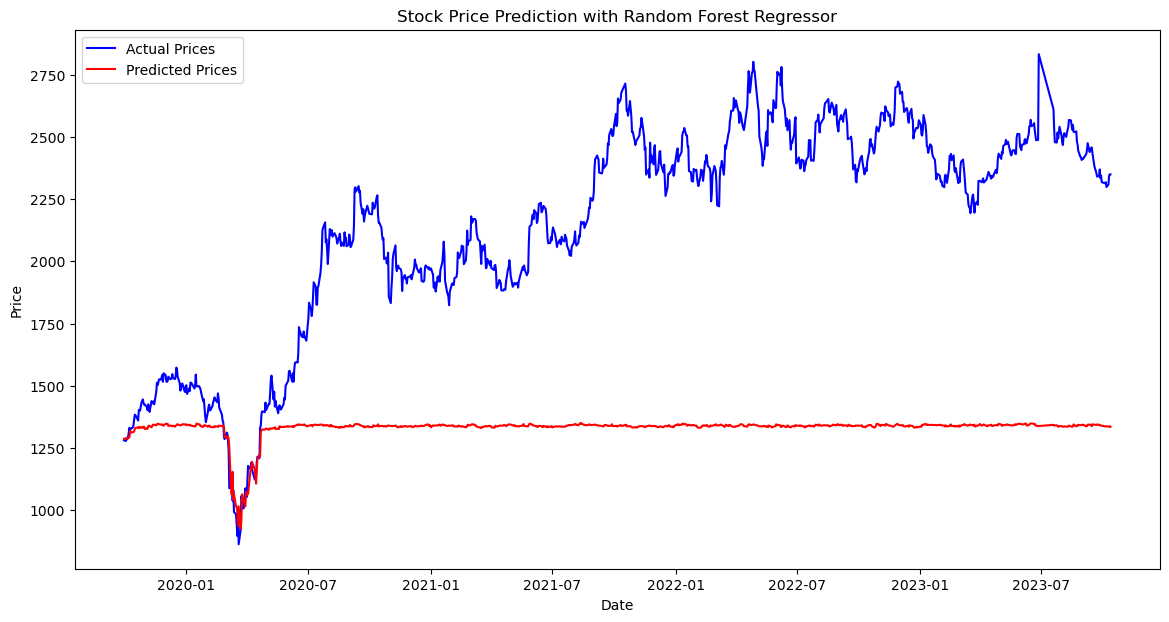

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction with Random Forest Regressor')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [30]:
y

Date
2010-04-21     481.224884
2010-04-22     486.794220
2010-04-23     479.211731
2010-04-26     474.738464
2010-04-27     455.055481
                 ...     
2023-10-06    2298.250000
2023-10-09    2308.399902
2023-10-10    2345.050049
2023-10-11    2349.399902
2023-10-12    2349.300049
Name: Target, Length: 3289, dtype: float64

In [31]:
# Backtesting and visualization of one of the models (e.g., LinearRegressio)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



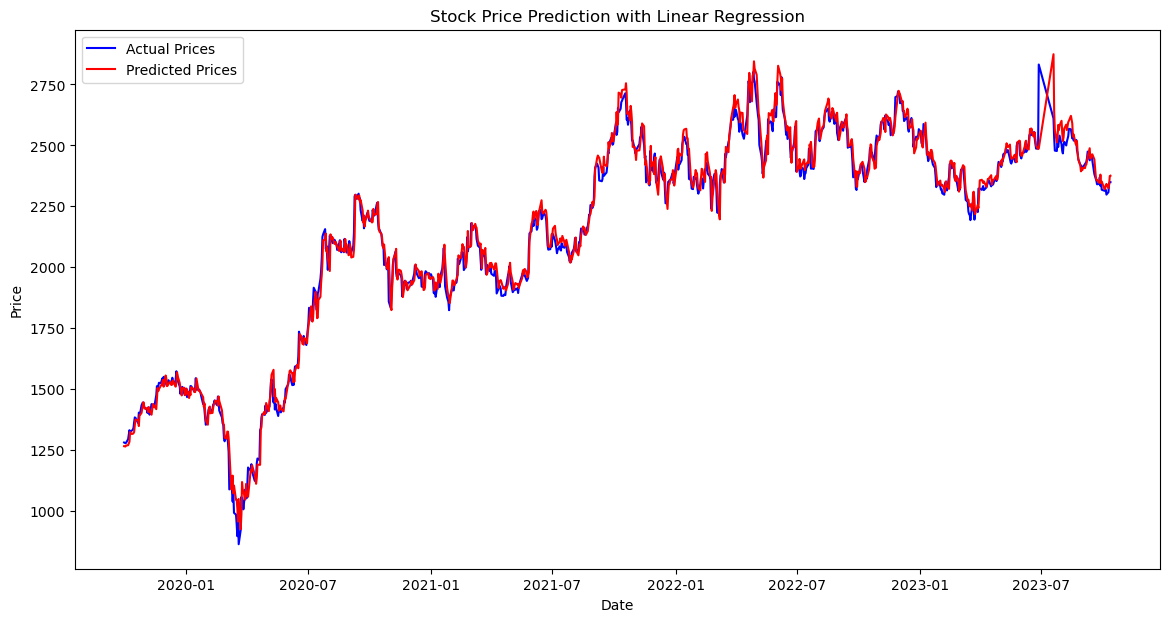

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [33]:
 mse = mean_squared_error(y_test, predictions)

In [34]:
mse

1953.3279862042177